# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [139]:
 print("When written as a data task this problem is a supervised regression task where we need to model\n" 
       "and predict the price of a used car based on its features. Using the vehicle dataset, I will begin by cleaning\n"
       "and preparing the data. then I will explore the distributions, and examine relationships utilizing skills like correlation\n"
       "and covariance. After preprocessing both numerical and categorical variables, I will build and evaluate several\n"
       "regression models including linear, polynomial, Ridge, and Lasso, to understand which features are most strongly \n"
       "associated with higher or lower car prices. The results of these models will help identify the factors that consumers\n"
       "tend to value most in the used-car market.")

When written as a data task this problem is a supervised regression task where we need to model
and predict the price of a used car based on its features. Using the vehicle dataset, I will begin by cleaning
and preparing the data. then I will explore the distributions, and examine relationships utilizing skills like correlation
and covariance. After preprocessing both numerical and categorical variables, I will build and evaluate several
regression models including linear, polynomial, Ridge, and Lasso, to understand which features are most strongly 
associated with higher or lower car prices. The results of these models will help identify the factors that consumers
tend to value most in the used-car market.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [140]:
print("Step 1: Get more info on the data set, for example using data.info(), data.head(), data.describe(), data.dtypes")

Step 1: Get more info on the data set, for example using data.info(), data.head(), data.describe(), data.dtypes


In [141]:
print("Step 2: Determine if all columns will be useful to determining impact on car price:\n" "Can drop VIN and ID since they are unique to each line\n" "Can drop region as it is not starndardized, some cities, some states some parts of states etc.\n")

Step 2: Determine if all columns will be useful to determining impact on car price:
Can drop VIN and ID since they are unique to each line
Can drop region as it is not starndardized, some cities, some states some parts of states etc.



In [142]:
print("Step 3: Determine which features have too many values missing to be useful and therefore should probably be dropped:\n" "Should drop Cylinders, Drive, Size, and Paint Color\n" "Note: 'Condition' is also missing for many cars, but feels integral to price")

Step 3: Determine which features have too many values missing to be useful and therefore should probably be dropped:
Should drop Cylinders, Drive, Size, and Paint Color
Note: 'Condition' is also missing for many cars, but feels integral to price


In [143]:
print("Step 4: Drop rows with missing critical data this includes price, year, odometer, condition, or manufacturer")


Step 4: Drop rows with missing critical data this includes price, year, odometer, condition, or manufacturer


In [144]:
print("Step 5: Drop rows with outliers in price")

Step 5: Drop rows with outliers in price


In [145]:
print("Step 6: Use year to create age feature, and drop the year feature")

Step 6: Use year to create age feature, and drop the year feature


In [146]:
print("Step 7: Examine the distributions of key variables")

Step 7: Examine the distributions of key variables


In [147]:
print("Step 8: Examine relationships between variables by looking at correlations and visualizing scatter plots")

Step 8: Examine relationships between variables by looking at correlations and visualizing scatter plots


In [148]:
print("Step 9: Connect findings back to the business goal by noting which features are most likely to influence car prices")

Step 9: Connect findings back to the business goal by noting which features are most likely to influence car prices


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [149]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from warnings import filterwarnings 
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [150]:
#read the data file and store
data = pd.read_csv('data/vehicles.csv')

In [151]:
# get first 10 rows to visualize features. 
data.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [152]:
#get more information on the data set including data type of each feature. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [153]:
#for numerical features get more info on distribution of the data set. 
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [154]:
#find number of null values in df for each feature.
data.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [155]:
# drop features that do not really provide value
data = data.drop(columns=['id', 'VIN', 'region'], errors='ignore')

In [156]:
# drop features that have too many missing values to provide value
data = data.drop(columns=['cylinders','size','drive', 'paint_color'],  errors='ignore')

In [157]:
#verify the data frame is updated to remove the features. 
data.head()

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,type,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [158]:
#drop rows missing key data (price, year, odometer, condition, or manufacturer)
data = data.dropna(subset=['price', 'year', 'odometer', 'manufacturer', 'condition'])

In [159]:
#determine the outliers in price
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

In [160]:
#remove the outlier
data_filtered = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [161]:
# change year to age
data_filtered['age'] = 2025 - data_filtered['year']

data_filtered = data_filtered.drop(columns=['year'], errors='ignore')


In [162]:
#normalize the price and odometer data
data_filtered['log_price'] = np.log1p(data_filtered['price'])
data_filtered['log_odometer'] = np.log1p(data_filtered['odometer'])

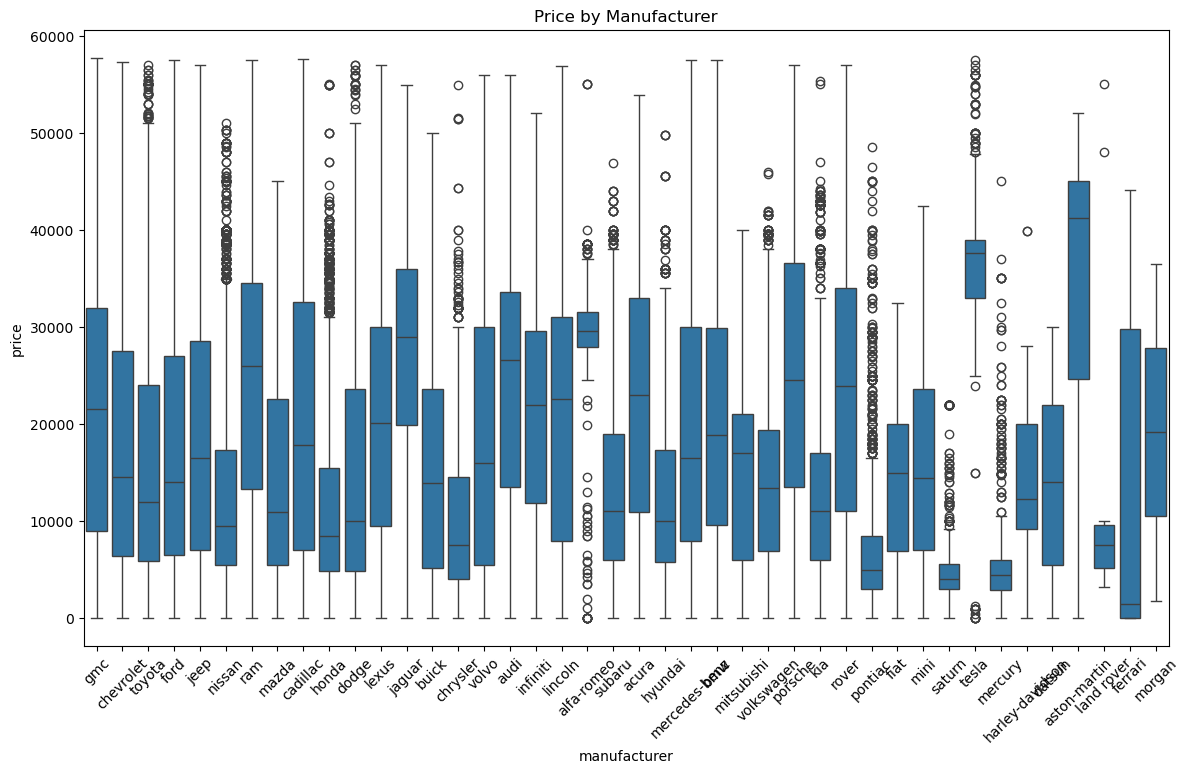

In [163]:
#create a boxplot of price by manufacturere
plt.figure(figsize=(14,8))
sns.boxplot(data=data_filtered, 
            x="manufacturer", y="price")
plt.title("Price by Manufacturer")
plt.xticks(rotation=45)
plt.show()

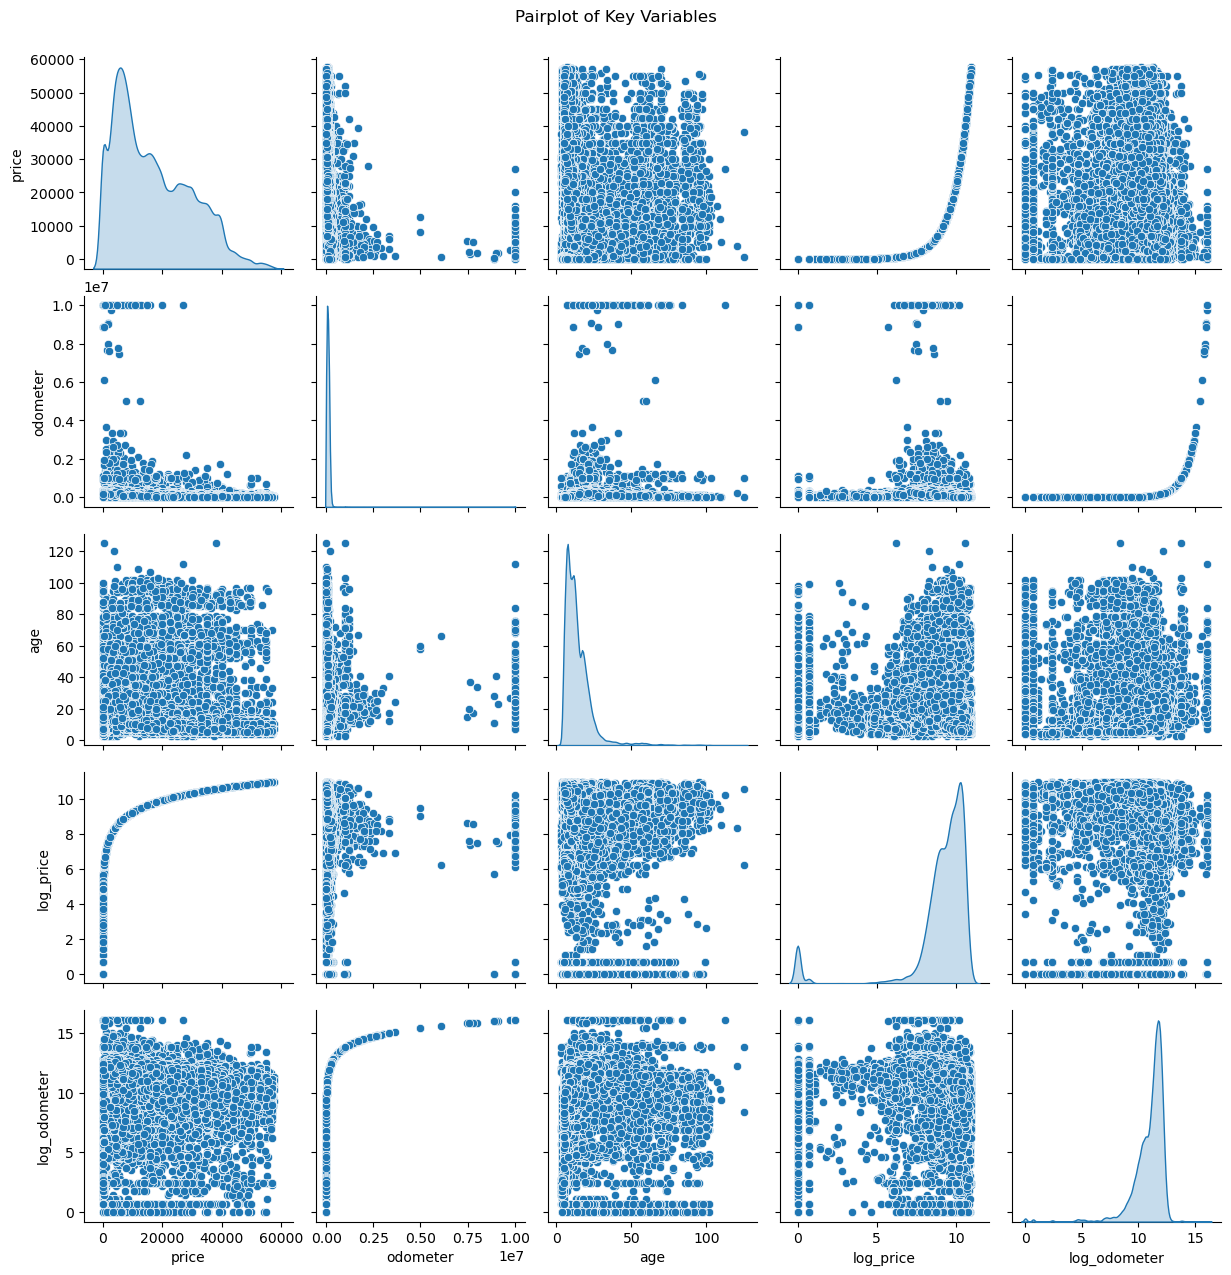

In [164]:
#create a pairplot
sns.pairplot(data_filtered, diag_kind="kde")
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()

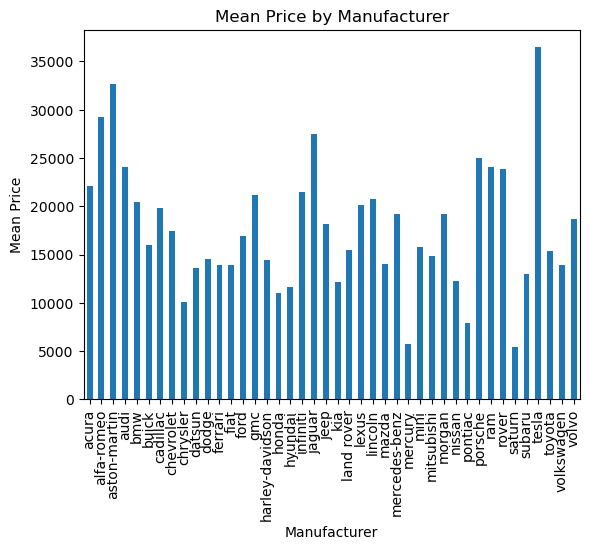

In [165]:
#create a barplot of mean price by manufacturer
mean_prices = data_filtered.groupby('manufacturer')['price'].mean()
mean_prices.plot(kind='bar', title='Mean Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price')
plt.show()

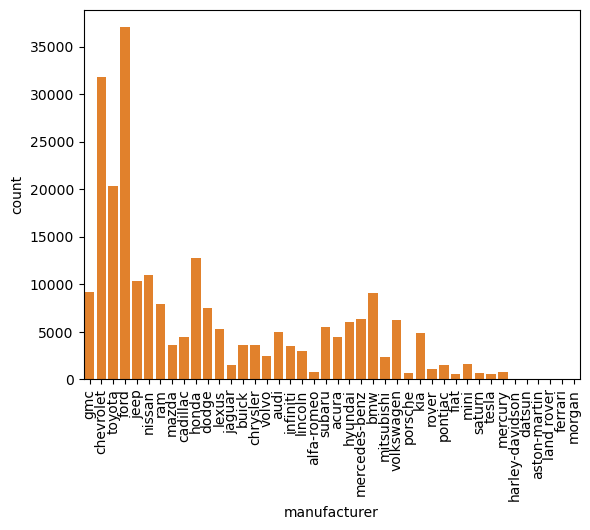

In [166]:
#create a countplot
sns.countplot(x='manufacturer', data=data_filtered)
ax = sns.countplot(data=data_filtered, x='manufacturer', order=data_filtered['manufacturer'].value_counts().index)

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

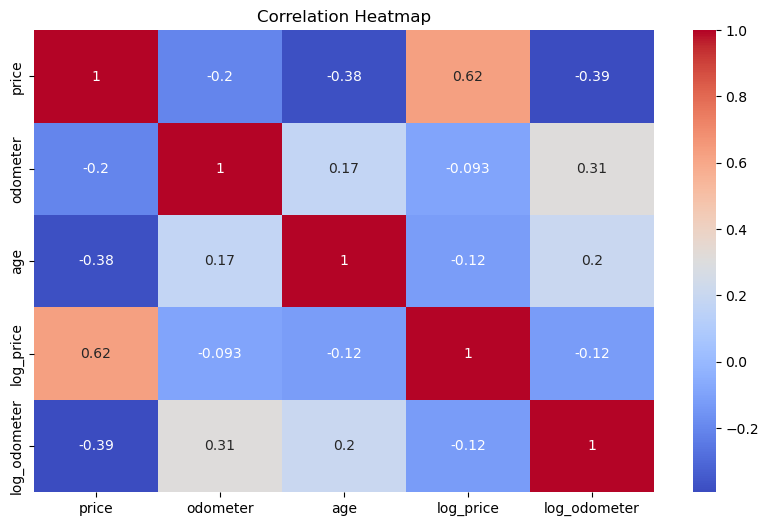

In [167]:
#output a correllation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data_filtered[['price','odometer','age','log_price','log_odometer']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

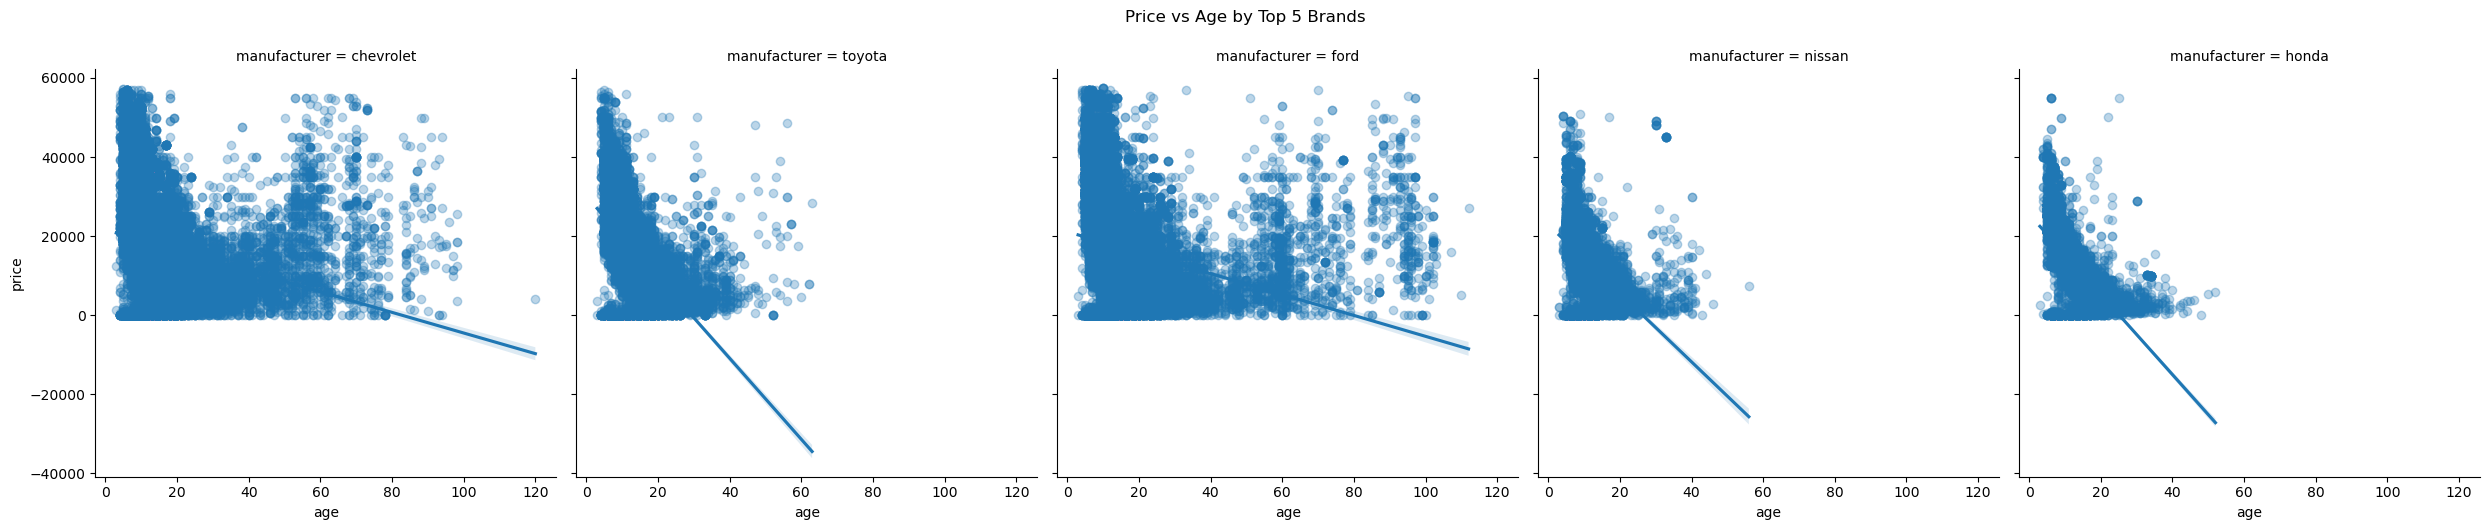

In [168]:
#plot price vs age for top 5 manufacturers
top5 = data_filtered['manufacturer'].value_counts().index[:5]

sns.lmplot(
    data=data_filtered[data_filtered['manufacturer'].isin(top5)],
    x='age', y='price', col='manufacturer',
    scatter_kws={'alpha':0.3}, line_kws={}
)
plt.suptitle("Price vs Age by Top 5 Brands", y=1.05)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [169]:
#import relvent libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [170]:
#linear regression with price target
#Define target and features
y = data_filtered['price']
X = data_filtered.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
numeric_features = ["odometer", "age", "log_odometer"]
categorical_features = ["manufacturer", "condition","fuel", "transmission", "type"]
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])
# Create pipeline with preprocessor and Linear Regression
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
# Fit the model
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
# Evaluation for test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Linear Regression Performance:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.4f}")

Linear Regression Performance:
Train RMSE: 8936.72
Train MSE: 79864896.56
Train R²: 0.4963
Test RMSE: 8929.85
Test MSE: 79742136.83
Test R²: 0.4975


In [171]:
#linear regression with log price target
y = data_filtered['log_price']
X = data_filtered.drop(columns=['log_price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
numeric_features = ["odometer", "age", "log_odometer"]
categorical_features = ["manufacturer", "condition","fuel", "transmission", "type"]
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])
# Create pipeline with preprocessor and Linear Regression
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', LinearRegression())])
# Fit the model
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
# Evaluation for test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
print("Linear Regression Performance:")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R²: {test_r2:.4f}")

Linear Regression Performance:
Train RMSE: 2.02
Train MSE: 4.06
Train R²: 0.1103
Test RMSE: 2.03
Test MSE: 4.10
Test R²: 0.1104


In [172]:
#Ridge Regression target: Price
# Define target and features
X = data_filtered.drop("price", axis=1)
y = data_filtered["price"]
numeric_features = ["odometer", "age", "log_odometer"]
categorical_features = ["manufacturer", "condition","fuel", "transmission", "type"]
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])
# Create pipeline with preprocessor and Ridge
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Ridge(alpha=1.0))])
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit Ridge Regression using the pipeline
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)
# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Ridge Regression Results")
print("-------------------------")
print(f"RMSE: {rmse:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"R^2:  {r2:.4f}")
# View coefficients 
ridge_model = model.named_steps['regressor']
preprocessor = model.named_steps['preprocessor']
feature_names = (numeric_features + preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist())
# Create DataFrame with coefficients
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": ridge_model.coef_}).sort_values(by="coefficient", ascending=False)
#coef_df.head()

Ridge Regression Results
-------------------------
RMSE: 8,929.52
MSE: 79,736,270.00
R^2:  0.4976


In [173]:
#Ridge Regression target: log Price
# Define target and features
X = data_filtered.drop("log_price", axis=1)
y = data_filtered["log_price"]
numeric_features = ["odometer", "age", "log_odometer"]
categorical_features = ["manufacturer", "condition","fuel", "transmission", "type"]
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])
# Create pipeline with preprocessor and Ridge
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Ridge(alpha=1.0))])
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit Ridge Regression using the pipeline
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)
# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Ridge Regression Results")
print("-------------------------")
print(f"RMSE: {rmse:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"R^2:  {r2:.4f}")
# View coefficients 
ridge_model = model.named_steps['regressor']
preprocessor = model.named_steps['preprocessor']
feature_names = (numeric_features + preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist())
# Create DataFrame with coefficients
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": ridge_model.coef_
}).sort_values(by="coefficient", ascending=False)
#coef_df.head()

Ridge Regression Results
-------------------------
RMSE: 2.03
MSE: 4.10
R^2:  0.1104


In [174]:
#Lasso Regression target: Price
# Define X (features) and y (target)
X = data_filtered.drop("price", axis=1)
y = data_filtered["price"]
numeric_features = ["odometer", "age", "log_odometer"]
categorical_features = ["manufacturer", "condition","fuel", "transmission", "type"]
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and Fit Lasso Regression using the pipeline
# Create pipeline with preprocessor and Lasso
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Lasso(alpha=0.01))])
# Fit the pipeline instead of just the Lasso model
model.fit(X_train, y_train)
# Predict on Test Set using the pipeline
y_pred = model.predict(X_test)
# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Lasso Regression Results")
print("-------------------------")
print(f"RMSE: {rmse:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"R^2:  {r2:.4f}")
# Access the coefficients from the regressor inside the pipeline
lasso_model = model.named_steps['regressor']
# Get feature names after preprocessing
preprocessor = model.named_steps['preprocessor']
feature_names = (numeric_features + preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist())
# Create DataFrame with coefficients
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": lasso_model.coef_
}).sort_values("coefficient", ascending=False)

#coef_df.head()


Lasso Regression Results
-------------------------
RMSE: 8,929.84
MSE: 79,742,106.89
R^2:  0.4975


In [175]:
#Lasso Regression target: logPrice
# Define X (features) and y (target)
X = data_filtered.drop("log_price", axis=1)
y = data_filtered["log_price"]
numeric_features = ["odometer", "age", "log_odometer"]
categorical_features = ["manufacturer", "condition","fuel", "transmission", "type"]
# Define preprocessor
preprocessor = ColumnTransformer(transformers=[("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)])
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and Fit Lasso Regression using the pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', Lasso(alpha=0.01))])
# Fit the pipeline instead of just the Lasso model
model.fit(X_train, y_train)
#Predict on Test Set using the pipeline
y_pred = model.predict(X_test)
# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Lasso Regression Results")
print("-------------------------")
print(f"RMSE: {rmse:,.2f}")
print(f"MSE: {mse:,.2f}")
print(f"R^2:  {r2:.4f}")
# Access the coefficients from the regressor inside the pipeline
lasso_model = model.named_steps['regressor']
# Get feature names after preprocessing
preprocessor = model.named_steps['preprocessor']
feature_names = (numeric_features + preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist())
# Create DataFrame with coefficients
coef_df = pd.DataFrame({"feature": feature_names,"coefficient": lasso_model.coef_}).sort_values("coefficient", ascending=False)

#coef_df.head()

Lasso Regression Results
-------------------------
RMSE: 2.04
MSE: 4.17
R^2:  0.0966


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [176]:
print(
    "All models performed consistently, demonstrating that the cleaned dataset and feature preprocessing\n"
    "produced stable, generalizable results. Linear Regression and Ridge Regression delivered the best\n"
    "predictive performance, each achieving a test RMSE of about $8,930, meaning the typical prediction\n"
    "error is roughly nine thousand dollars. While this may seem large, it is reasonable given the broad\n"
    "price range of used cars (from under $1,000 to over $100,000).\n\n"
    "Log-transformed models helped stabilize variance and provide more interpretable coefficient effects\n"
    "Lasso regression offered slightly weaker prediction accuracy, reflecting the fact that many \n"
    "features contribute meaningful yet small amounts of information to price prediction.\n\n\n"
    "Overall, the modeling results show that vehicle age, odometer reading, manufacturer, condition,\n"
    "and type are major drivers of price, and the models are stable and generalize well to unseen data.\n"
    "These insights directly support the business goal of understanding what consumers value in used cars."
)

All models performed consistently, demonstrating that the cleaned dataset and feature preprocessing
produced stable, generalizable results. Linear Regression and Ridge Regression delivered the best
predictive performance, each achieving a test RMSE of about $8,930, meaning the typical prediction
error is roughly nine thousand dollars. While this may seem large, it is reasonable given the broad
price range of used cars (from under $1,000 to over $100,000).

Log-transformed models helped stabilize variance and provide more interpretable coefficient effects
Lasso regression offered slightly weaker prediction accuracy, reflecting the fact that many 
features contribute meaningful yet small amounts of information to price prediction.


Overall, the modeling results show that vehicle age, odometer reading, manufacturer, condition,
and type are major drivers of price, and the models are stable and generalize well to unseen data.
These insights directly support the business goal of understandi

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [177]:
print("Data Driven Insights to Maximize Used Car Profitability\n"
"\n"
"In the analysis of used vehicle listings identified the strongest drivers of resale value and evaluated several predictive models to estimate vehicle price.\n"
"The best models (Linear and Ridge Regression) achieved a error of about $8,930, which is strong performance given the wide price range of used cars.\n"
"These results provide reliable guidance for purchasing, pricing, and inventory strategy.\n"
"\n"
"What Drives Profit the Most\n"
"Dealers looking to maximize margins should prioritize vehicles with the following characteristics:\n"
"Low Mileage: The most influential factor. Low mileage vehicles consistently command a premium and sell faster.\n"
"Newer Model: Depreciation is predictable and newer vehicles yield higher resale ROI.\n"
"Strong Manufacturers: Brands with strong reliability reputations (Toyota, Honda, Lexus, Mercedes, BMW) show significantly higher retained value.\n"
"Better Condition Grades: Differences between good, excellent, and like new produce meaningful price increases.\n"
"High Demand Vehicle Types: Trucks and SUVs provide stronger resale margins compared to sedans.\n"
"\n"
"Next Steps and Recommendations\n"
"Buy Low Mileage, High Condition Units Whenever Possible: These offer the strongest and most predictable resale margins.\n"
"Emphasize High Retention Brands: Stocking more Toyota, Honda, Lexus, Mercedes, BMW increases turnover speed and reduces pricing risk.\n"
"Be Selective With Poor Condition Vehicles: Only purchase fair or salvage units when the discount outweighs any fixing costs.\n"
"Favor Trucks and SUVs: These consistently produce higher margins and stronger demand."
)

Data Driven Insights to Maximize Used Car Profitability

In the analysis of used vehicle listings identified the strongest drivers of resale value and evaluated several predictive models to estimate vehicle price.
The best models (Linear and Ridge Regression) achieved a error of about $8,930, which is strong performance given the wide price range of used cars.
These results provide reliable guidance for purchasing, pricing, and inventory strategy.

What Drives Profit the Most
Dealers looking to maximize margins should prioritize vehicles with the following characteristics:
Low Mileage: The most influential factor. Low mileage vehicles consistently command a premium and sell faster.
Newer Model: Depreciation is predictable and newer vehicles yield higher resale ROI.
Strong Manufacturers: Brands with strong reliability reputations (Toyota, Honda, Lexus, Mercedes, BMW) show significantly higher retained value.
Better Condition Grades: Differences between good, excellent, and like new prod